# Dataset Exploration

---
In this notebook, we explore the in put data file and the different datasets contained in it
- A set of physics-motivated high-level features 
- Jets represented as an image
- Jets represented as a list of particles
These different representations will be used to train different kind of networks while solving the same problem,
a classification task aiming to distinguish jets originating from quarks, gluons, Ws, Zs, or top quarks.

---

We start loading the main libraries
- h5py to read the input HDF5 file
- numpy top handle the datasets stored there
- matplotlib for graphs
---

In [134]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

%matplotlib inline

## Reading the data

---
In order to import the dataset, we now
- clone the dataset repository (to import the data in Colab)
- load the h5 files in the data/ repository
- extract the data we need: a target and jetImage 

To type shell commands, we start the command line with !

In [135]:
# ! git clone https://github.com/pierinim/tutorials.git
# ! ls tutorials/Data/JetDataset/
# file = 'tutorials/Data/JetDataset/jetImage_7_100p_30000_40000.h5'

This last line is there to tell matplotlib to open the graphs inside the jupyter notebook

In [136]:
# let's open the file
file = '../data/jetImage_7_100p_80000_90000.h5'
f = h5py.File(file)
# and see what it contains
print(list(f.keys()))

['jetConstituentList', 'jetFeatureNames', 'jetImage', 'jetImageECAL', 'jetImageHCAL', 'jets', 'particleFeatureNames']


In [137]:
list(f.values())

[<HDF5 dataset "jetConstituentList": shape (10000, 100, 16), type "<f8">,
 <HDF5 dataset "jetFeatureNames": shape (59,), type "|O">,
 <HDF5 dataset "jetImage": shape (10000, 100, 100), type "<f8">,
 <HDF5 dataset "jetImageECAL": shape (10000, 100, 100), type "<f8">,
 <HDF5 dataset "jetImageHCAL": shape (10000, 100, 100), type "<f8">,
 <HDF5 dataset "jets": shape (10000, 59), type "<f8">,
 <HDF5 dataset "particleFeatureNames": shape (17,), type "|O">]

---
- 'jetConstituentList' is the list of particles cointained in the jet. For each particle, a list of relevant quantities is stored
- 'jetFeatureNames' is the list of the names corresponding to the quantities contained in 'jets'
- 'jetImage' contains the image representation of the jets (more later)
- 'jetImageECAL' and 'jetImageHCAL' are the ECAL- and HCAL-only equivalent images. We will not use them (but you are more than welcome to play with it)
- 'particleFeatureNames' is the list of the names corresponding to the quantities contained in 'jetConstituentList'
- 'jets' is the dataset we consider for the moment

The first 100 highest-$p_T$ particles are considered for each jet

---

## The physics-motivated high-level features

We then open the input file and load the 'jet' data, containing
- the discriminating quantities
- the truth (which kind of jet we are dealing with)

In [138]:
# These are the quantities we are dealing with
featurenames = f.get('jetFeatureNames')
print(featurenames[:])
# the b is due to the byte vs utf-8 encoding of the strings in the dataset
# just ignore them for the moment

[b'j_ptfrac' b'j_pt' b'j_eta' b'j_mass' b'j_tau1_b1' b'j_tau2_b1'
 b'j_tau3_b1' b'j_tau1_b2' b'j_tau2_b2' b'j_tau3_b2' b'j_tau32_b1'
 b'j_tau32_b2' b'j_zlogz' b'j_c1_b0' b'j_c1_b1' b'j_c1_b2' b'j_c2_b1'
 b'j_c2_b2' b'j_d2_b1' b'j_d2_b2' b'j_d2_a1_b1' b'j_d2_a1_b2' b'j_m2_b1'
 b'j_m2_b2' b'j_n2_b1' b'j_n2_b2' b'j_tau1_b1_mmdt' b'j_tau2_b1_mmdt'
 b'j_tau3_b1_mmdt' b'j_tau1_b2_mmdt' b'j_tau2_b2_mmdt' b'j_tau3_b2_mmdt'
 b'j_tau32_b1_mmdt' b'j_tau32_b2_mmdt' b'j_c1_b0_mmdt' b'j_c1_b1_mmdt'
 b'j_c1_b2_mmdt' b'j_c2_b1_mmdt' b'j_c2_b2_mmdt' b'j_d2_b1_mmdt'
 b'j_d2_b2_mmdt' b'j_d2_a1_b1_mmdt' b'j_d2_a1_b2_mmdt' b'j_m2_b1_mmdt'
 b'j_m2_b2_mmdt' b'j_n2_b1_mmdt' b'j_n2_b2_mmdt' b'j_mass_trim'
 b'j_mass_mmdt' b'j_mass_prun' b'j_mass_sdb2' b'j_mass_sdm1'
 b'j_multiplicity' b'j_g' b'j_q' b'j_w' b'j_z' b'j_t' b'j_undef']


In [140]:
featurenames = f.get('particleFeatureNames')
print(featurenames[:])

[b'j1_px' b'j1_py' b'j1_pz' b'j1_e' b'j1_erel' b'j1_pt' b'j1_ptrel'
 b'j1_eta' b'j1_etarel' b'j1_etarot' b'j1_phi' b'j1_phirel' b'j1_phirot'
 b'j1_deltaR' b'j1_costheta' b'j1_costhetarel' b'j1_pdgid']


In [139]:
np.array(f.get('jetConstituentList'))[0]

array([[ 7.21311951e+01,  6.03492050e+01,  5.79462357e+01,
         1.10465935e+02,  9.22837108e-02,  9.40475159e+01,
         9.17012468e-02,  5.82613647e-01,  1.34234335e-02,
        -0.00000000e+00,  6.96697712e-01,  9.86787025e-03,
         0.00000000e+00,  1.66602246e-02,  5.24562478e-01,
         6.12323426e-17],
       [ 6.89846039e+01,  5.72669411e+01,  5.47032814e+01,
         1.05027748e+02,  8.77406299e-02,  8.96570053e+01,
         8.74202624e-02,  5.77499986e-01,  8.30980111e-03,
         2.63171270e-03,  6.92851245e-01,  6.02143817e-03,
        -5.83250402e-03,  1.02620805e-02,  5.20846009e-01,
         2.63170665e-03],
       [ 5.92114029e+01,  4.84079361e+01,  4.73372459e+01,
         8.99451675e+01,  7.51405731e-02,  7.64808350e+01,
         7.45728165e-02,  5.84999979e-01,  1.58098005e-02,
        -7.55373901e-03,  6.85347438e-01, -1.48239546e-03,
        -8.80151149e-03,  1.58791337e-02,  5.26290059e-01,
        -7.55359512e-03],
       [ 5.62026558e+01,  4.71552391e

In [ ]:
# type(f.get('jetImage'))
with h5py.File('../data/jetImage_7_100p_80000_90000.h5', "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]
    
    print(a_group_key)

    # Get the data
    data = list(f[a_group_key])

---
The ground truth is incorporated in the ['j_g', 'j_q', 'j_w', 'j_z', 'j_t] vector of boolean, taking the form
- [1, 0, 0, 0, 0] for gluons
- [0, 1, 0, 0, 0] for quarks
- [0, 0, 1, 0, 0] for Ws
- [0, 0, 0, 1, 0] for Zs
- [0, 0, 0, 0, 1] for tops

This is what is called 'one-hot' encoding of a descrete label (typical of ground truth for classification problems)

We define the 'target' of our problem the set of these labels

In [80]:
jet_data = np.array(f.get('jets'))
targets = jet_data[:,-6:-1]

# number of undefined/unidentified jet originated particles (i.e., particles are not quarks, gluons, Ws, Zs, or top quarks)
print("Number of undef particles:")
print(sum([1 if target[-1] == 1 else 0 for target in jet_data[:,-6:]]))

# shape of the dataset
print("Dataset shape:")
print(targets.shape)

print("Labels (one-hot-encoded):")
print(featurenames[-6:-1])

print("First five entries:")
for i in range(5):
    print(targets[i])
    
print("Last 5 entries:")
for i in range(-5,0):
    print(targets[i])

Number of undef particles:
0
Dataset shape:
(10000, 5)
Labels (one-hot-encoded):
[b'j_g' b'j_q' b'j_w' b'j_z' b'j_t']
First five entries:
[0. 1. 0. 0. 0.]
[0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0.]
Last 5 entries:
[0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0.]
[1. 0. 0. 0. 0.]


As you can see there are 10K examples in this file. We will need more for a meaningful training (more later)

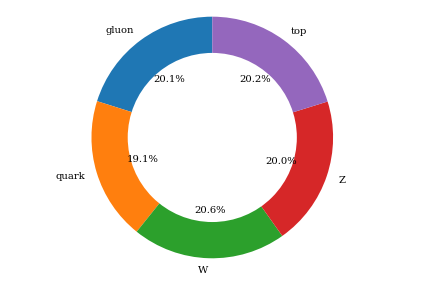

In [81]:
plt.pie(
    np.sum(targets, axis=0), 
    labels=["gluon", "quark", "W", "Z", "top"],
    autopct='%1.1f%%', 
    startangle=90,
)

plt.axis('equal')  
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))

plt.tight_layout()
plt.show()

The five target categories are relatively balanced, thus, not data-balance strategy is needed.

---

And now the input-feature dataset

In [82]:
features = np.array(jet_data[:,:-6])
print(features.shape)

(10000, 53)


We have 53 features for each of the 66K jets
We now make some plot
--- 

In [83]:
labelCat= ["gluon", "quark", "W", "Z", "top"]
# this function makes the histogram of a given quantity for the five classes
def makePlot(feature_index, features, input_featurenames):
    plt.subplots()
    for i in range(len(labelCat)):
        # notice the use of numpy masking to select specific classes of jets
        my_data = features[np.argmax(target, axis=1) == i]
        # then plot the right quantity for the reduced array
        plt.hist(my_data[:,feature_index], 50, density=True, histtype='step', fill=False, linewidth=1.5)
    plt.yscale('log', nonposy='clip')    
    plt.legend(labelCat, fontsize=12, frameon=False)  
    plt.xlabel(str(input_featurenames[feature_index], "utf-8"), fontsize=15)
    plt.ylabel('Prob. Density (a.u.)', fontsize=15)
    plt.show()
    #del fig, ax
    #return fig, ax
    
# def plot(features, featurenames):
#     """
#         Generate histogram distribution plot for all input features,  for different category particle jets
#     """
    

NameError: name 'target' is not defined

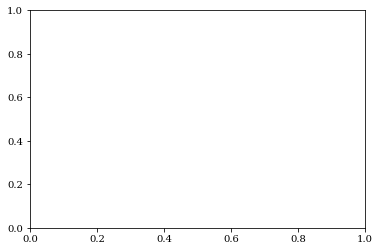

In [84]:
# we now plot all the features
for i in range(len(featurenames[:-6])):
    makePlot(i, features, featurenames)
    #fig.show()

More information on these quantities can be found in https://arxiv.org/pdf/1709.08705.pdf

---

# The image dataset

Jets can be converted to images considering the (&eta;, &phi;) plane, centered along the axis direction and binned.
In our case, we consider a square of 1.6x1.6 in size (because the jet size is R=0.8) binned in 100x100 equal-size 'cells'

Image inputs shape: (10000, 100, 100)


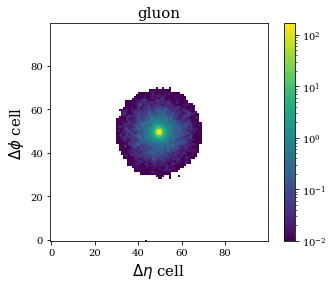

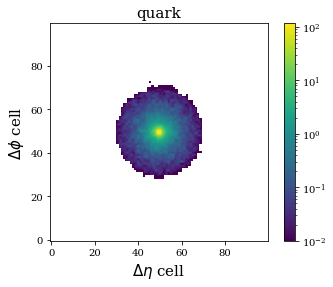

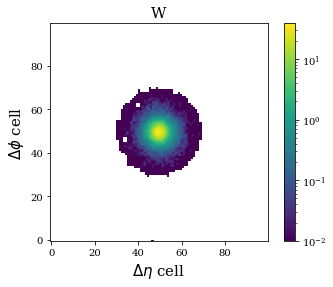

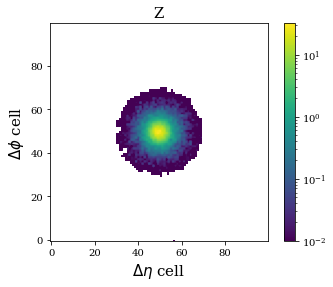

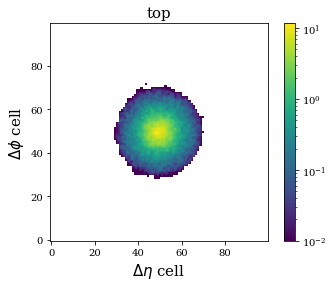

In [89]:
IMAGE_TYPE : str = 'jetImage' # 'jetImage' | 'jetImageECAL' | 'jetImageHCAL'
LABEL_NAMES = ["gluon", "quark", "W", "Z", "top"]

images = np.array(f.get(IMAGE_TYPE)) # (10000, 100, 100)

print("Image inputs shape:", images.shape)

images_g = images[np.argmax(targets, axis=1) == 0]
images_q = images[np.argmax(targets, axis=1) == 1]
images_W = images[np.argmax(targets, axis=1) == 2]
images_Z = images[np.argmax(targets, axis=1) == 3]
images_t = images[np.argmax(targets, axis=1) == 4]

images = [images_q, images_g, images_W, images_Z, images_t]

for i in range(len(images)):
    sum_image = np.sum(images[i], axis = 0)
    plt.imshow(sum_image/float(images[i].shape[0]), origin='lower', norm=LogNorm(vmin=0.01))
#     sum_image = images[i][10]
#     print(sum_image.shape)
#     plt.imshow(sum_image)
    plt.colorbar()
    plt.title(LABEL_NAMES[i], fontsize=15)
    plt.xlabel("$\Delta\eta$ cell", fontsize=15)
    plt.ylabel("$\Delta\phi$ cell", fontsize=15)
    plt.show()

# images_g
# plt.imshow(images_g[1])
# plt.title('gluon', fontsize=15)
# plt.xlabel("$\Delta\eta$ cell", fontsize=15)
# plt.ylabel("$\Delta\phi$ cell", fontsize=15)
# plt.show()



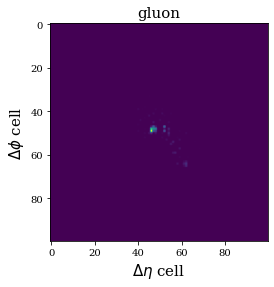

In [101]:
plt.imshow(images_g[199])
plt.title('gluon', fontsize=15)
plt.xlabel("$\Delta\eta$ cell", fontsize=15)
plt.ylabel("$\Delta\phi$ cell", fontsize=15)
plt.show()

# The particle-list dataset

In this case, we look at the particle-related features that we have stored for each jet constituent. The structure of the dataset is similar to that of the physics-motivated features, except for the fact that we have now a double-index dataset: (jet index, particle index).
The list is cut at XXX constituents /jet. If less are found, the dataset is completed filling it with 0s (zero padding)

In [ ]:
p_featurenames = f.get("particleFeatureNames")
print(p_featurenames[:])

In [ ]:
p_data = f.get("jetConstituentList")
print(p_data.shape)

In [ ]:
labelCat= ["gluon", "quark", "W", "Z", "top"]
# this function makes the histogram of a given quantity for the five classes
def makePlot_p(feature_index, input_data, input_featurenames):
    plt.subplots()
    for i in range(len(labelCat)):
        my_data = input_data[:,:,feature_index]
        # notice the use of numpy masking to select specific classes of jets
        my_data = my_data[np.argmax(target, axis=1) == i]
        # then plot the right quantity for the reduced array
        plt.hist(my_data[:,feature_index].flatten(), 50, density=True, histtype='step', fill=False, linewidth=1.5)
    plt.yscale('log', nonposy='clip')    
    plt.legend(labelCat, fontsize=12, frameon=False)  
    plt.xlabel(str(input_featurenames[feature_index], "utf-8"), fontsize=15)
    plt.ylabel('Prob. Density (a.u.)', fontsize=15)
    plt.show()
    #del fig, ax
    #return fig, ax

In [ ]:
# we now plot all the features
for i in range(len(p_featurenames)):
    makePlot_p(i, p_data, p_featurenames)
    #fig.show()